In [1]:
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
import read_model_ID;
reload(read_model_ID);

## Load fit data and identify best fit

In [2]:
simset = []
no_good = []
final_par = []

chi_squared = []

file = '../fits_Stijn/14_3_2019/fit_14_3_2019_sim_'
parameters = np.loadtxt('example-params-2.txt')

#---------- collect simulations ---------------
for sim in range(1,31):
#for sim in [1,3,4,7,9,10,11,12,13,17,19,20,24,25,27,29,30,35,37,39,40,43,44,45,50]: #useful for 28_2_2019 run4
#for sim in [2,3,4,7,8,10,11,12,13,14,15,16,17,19,20]:
    sa = pd.read_csv(file +str(sim)+'.txt', delimiter='\t', index_col=False)
    filename = file +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    final_par_temp = sa.loc[len(sa)-1,'Parameter 1':'Parameter 42']
    final_par.append(final_par_temp.values)
    
best_fit = simset[np.argmin(chi_squared)]
print 'best fit: ' + best_fit
print 'all chi_squared: ' + str(chi_squared)

best fit: ../fits_Stijn/14_3_2019/fit_14_3_2019_sim_23.txt
all chi_squared: [368.574468619, 1374.21753049, 340.426337094, 626.20092996, 356.881750054, 352.604567101, 428.375249788, 435.110388481, 370.760866056, 569.632644392, 425.91793804599996, 1368.132805, 564.864523963, 395.33350074599997, 365.60970076300003, 526.4346229619999, 345.206428191, 340.662926566, 338.467110071, 474.729055533, 338.272586332, 342.78223617, 336.236239112, 339.355988185, 435.80848228300005, 341.488313481, 360.03297178, 488.8000741, 337.93942045299997, 493.437020046]


Text(0.5,1,'all final values of chi_squared')

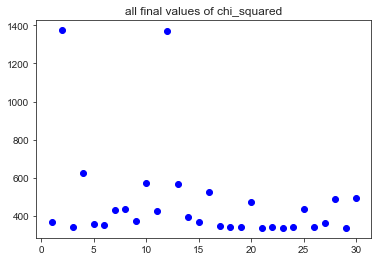

In [11]:
chi_squared = np.array(chi_squared)
indices_low_chi = np.where(chi_squared<500)
final_par_low_chi = np.array(final_par)[indices_low_chi[0]]
plt.plot(range(1,len(chi_squared)+1),chi_squared,'bo')
plt.title('all final values of chi_squared')

## Finding Median

In [12]:
median = np.zeros(len(final_par_low_chi[0]))
for i in range(len(final_par_low_chi[0])):
    median_temp = list()
    for j in range(len(final_par_low_chi)):
        median_temp.append(final_par_low_chi[j][i])
    median[i] = np.median(np.array(median_temp))
    
print len(final_par_low_chi)
        

24


## Matches

Text(0.5,1,'matches')

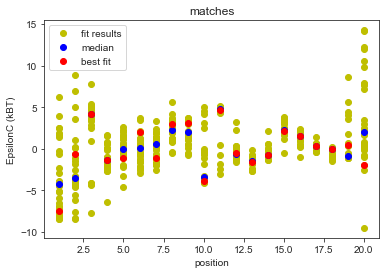

In [6]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,21),final_par_low_chi[i][0:20],'yo',label='fit results')
    
plot2, = plt.plot(range(1,21),median[0:20],'bo',label='median')
plot3, = plt.plot(range(1,21),final_par[np.argmin(chi_squared)][0:20],'ro',label='best fit')
#plot4, = plt.plot(range(1,21),parameters[0:20],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3])
plt.xlabel('position')
plt.ylabel('EpsilonC (kBT)')
plt.title('matches')


## Mismatches

Text(0.5,1,'mismatches')

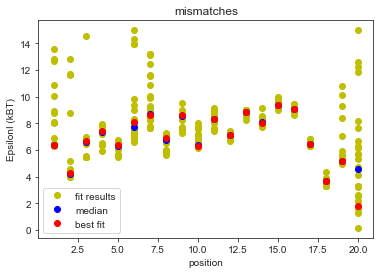

In [7]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,21),final_par_low_chi[i][20:40],'yo',label='fit results')

plot2, = plt.plot(range(1,21),median[20:40],'bo',label='median')
plot3, = plt.plot(range(1,21),final_par[np.argmin(chi_squared)][20:40],'ro',label='best fit')
#plot4, = plt.plot(range(1,21),parameters[20:40],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3])
plt.xlabel('position')
plt.ylabel('EpsilonI (kBT)')
plt.title('mismatches')

## Energy Landscape

[0, 21, -15, 10]

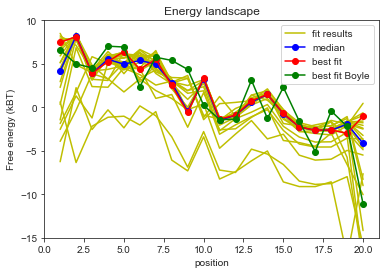

In [13]:
best_fit_boyle = np.loadtxt('best_fit.txt')
best_fit_boyle = (best_fit_boyle[2:22]-best_fit_boyle[1])

matrix = np.zeros([20,len(final_par_low_chi)])

plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,21),-np.cumsum(final_par_low_chi[i][0:20]),'y-',label='fit results')
    matrix[:,i] = -np.cumsum(final_par_low_chi[i][0:20])
    
medianmatrix = np.median(matrix, 1)
    
plot2, = plt.plot(range(1,21),medianmatrix,'b-o', label='median')    
plot3, = plt.plot(range(1,21),-np.cumsum(final_par[np.argmin(chi_squared)][0:20]),'r-o',label='best fit')
#plot4, = plt.plot(range(1,21),-np.cumsum(parameters[0:20]),'k-o',label='actual values')
plot5 = plt.plot(range(1,21),best_fit_boyle,'g-o',label='best fit Boyle')

plt.legend(handles=[plot1,plot2,plot3,plot5[0]])
plt.xlabel('position')
plt.ylabel('Free energy (kBT)')
plt.title('Energy landscape')
plt.axis([0,21,-15,10])

## Forward rates

Text(0,0.5,'rate (/s)')

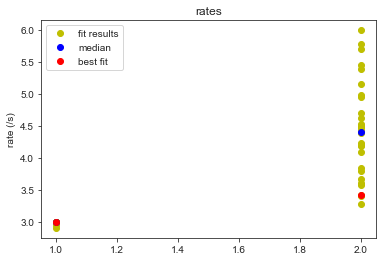

In [9]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,3),final_par_low_chi[i][40:42],'yo',label='fit results')

plot2, = plt.plot(range(1,3),median[40:42],'bo',label='median')
plot3, = plt.plot(range(1,3),final_par[np.argmin(chi_squared)][40:42],'ro',label='best fit')
#plot4, = plt.plot(range(1,4),parameters[40:43],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3])
plt.title('rates')
plt.ylabel('rate (/s)')

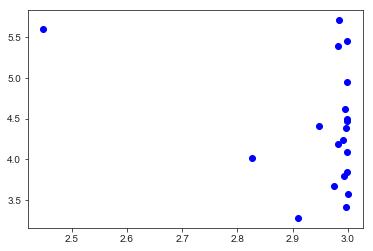

In [64]:
for i in range(len(final_par)):
    plt.plot(final_par[i][40],final_par[i][41], marker = 'o', color = 'blue')